In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv('final_supply.csv')

In [24]:
df.head()

,Transport Type,Delay,Actual Timeline,Actual Cost,Security_Score,Traceability_Score,Demand_Forecast,Supply_Chain_Visibility,Transport_Encoded,On-Time Delivery Rate
0,Roadways,4,13,3.830407,1.6,2.2,6041,2,1,51.810464
1,Railways,2,5,4.910965,2.4,2.2,8793,3,2,50.601805
2,Waterways,1,3,3.781504,2.4,1.4,7384,2,3,88.806705
3,Roadways,4,8,3.501386,2.4,2.2,9237,2,1,34.895588
4,Roadways,2,6,4.746425,2.0,2.2,8573,1,1,64.700035


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Transport Type           1000 non-null   object 
 1   Delay                    1000 non-null   int64  
 2   Actual Timeline          1000 non-null   int64  
 3   Actual Cost              1000 non-null   float64
 4   Security_Score           1000 non-null   float64
 5   Traceability_Score       1000 non-null   float64
 6   Demand_Forecast          1000 non-null   int64  
 7   Supply_Chain_Visibility  1000 non-null   int64  
 8   Transport_Encoded        1000 non-null   int64  
 9   On-Time Delivery Rate    1000 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 78.3+ KB


In [26]:
df.describe()

,Delay,Actual Timeline,Actual Cost,Security_Score,Traceability_Score,Demand_Forecast,Supply_Chain_Visibility,Transport_Encoded,On-Time Delivery Rate
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2.475000,7.56100,3.012571,2.324400,2.213800,8005.161000,1.965000,1.97400,59.746624
std,1.140472,2.81215,1.178715,0.312766,0.341007,1187.233868,0.813903,0.80621,15.085931
min,1.000000,2.00000,1.023551,1.600000,1.400000,6002.000000,1.000000,1.00000,18.002640
25%,1.000000,5.00000,1.974013,2.200000,2.000000,6938.250000,1.000000,1.00000,49.821146
50%,2.500000,8.00000,2.917642,2.400000,2.200000,8061.500000,2.000000,2.00000,59.655782
75%,3.250000,10.00000,4.043724,2.600000,2.400000,9074.500000,3.000000,3.00000,70.004076
max,4.000000,13.00000,5.030190,3.000000,3.000000,9995.000000,3.000000,3.00000,100.000000


In [27]:
df.isnull().sum()

Transport Type             0
Delay                      0
Actual Timeline            0
Actual Cost                0
Security_Score             0
Traceability_Score         0
Demand_Forecast            0
Supply_Chain_Visibility    0
Transport_Encoded          0
On-Time Delivery Rate      0
dtype: int64

In [28]:
df['Transport Type'].value_counts()

Transport Type
Railways     350
Roadways     338
Waterways    312
Name: count, dtype: int64

In [29]:
print('Supply Chain Visibility Scores:')
print('1-Low, 2-Medium, 3-High')
df['Supply_Chain_Visibility'].value_counts()

Supply Chain Visibility Scores:
1-Low, 2-Medium, 3-High


Supply_Chain_Visibility
1    349
2    337
3    314
Name: count, dtype: int64

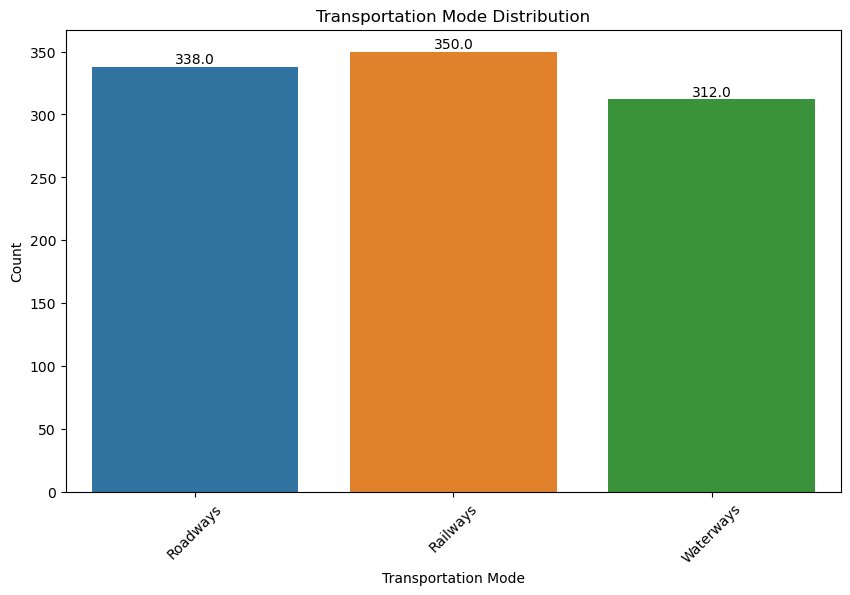

In [30]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=df, x='Transport Type')
plt.title('Transportation Mode Distribution')
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

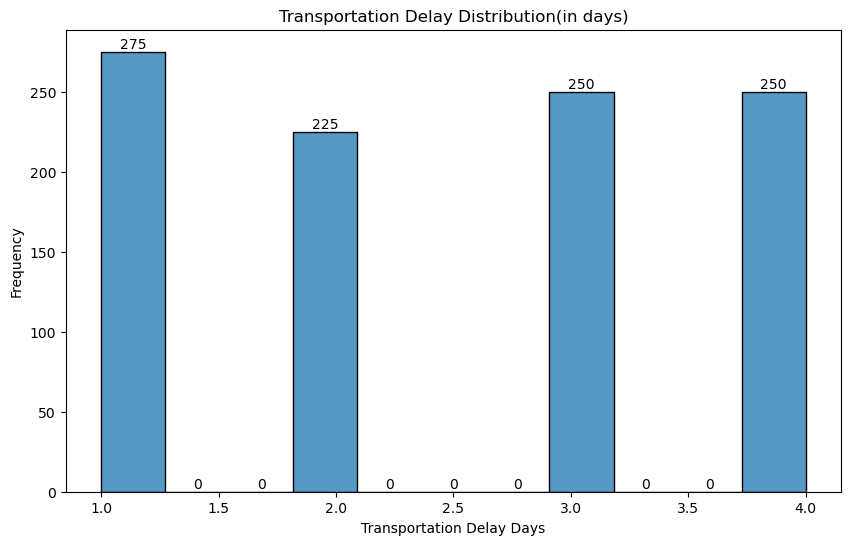

In [31]:
# Histogram for Transportation Delay Hours
plt.figure(figsize=(10, 6))
ax=sns.histplot(data=df, x='Delay')
plt.title('Transportation Delay Distribution(in days)')
plt.xlabel('Transportation Delay Days')
plt.ylabel('Frequency')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

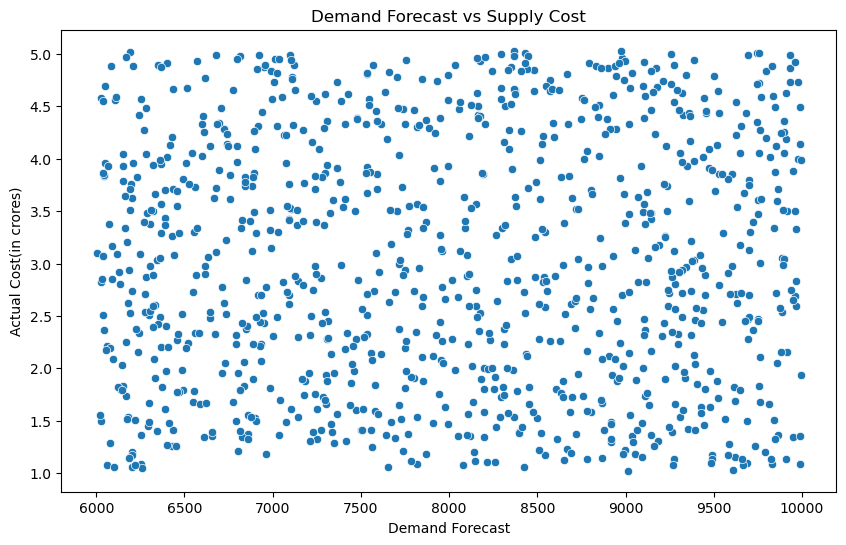

In [32]:
# Scatter plot for Demand Forecast vs Supply Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Demand_Forecast', y='Actual Cost')
plt.title('Demand Forecast vs Supply Cost')
plt.xlabel('Demand Forecast')
plt.ylabel('Actual Cost(in crores)')
plt.show()


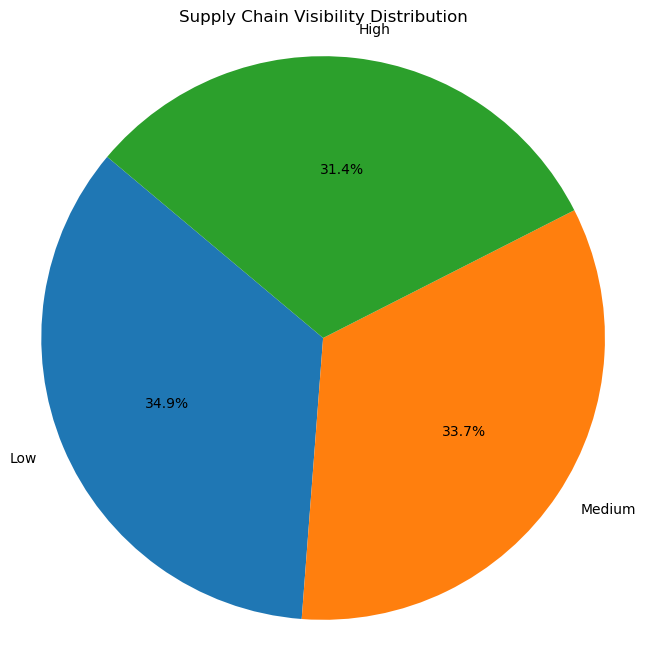

In [33]:
# Pie chart for Supply Chain Visibility
plt.figure(figsize=(8, 8))
labels = ['Low','Medium','High']
sizes = df['Supply_Chain_Visibility'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Supply Chain Visibility Distribution')
plt.axis('equal')
plt.show()

c:\Users\Aniket\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


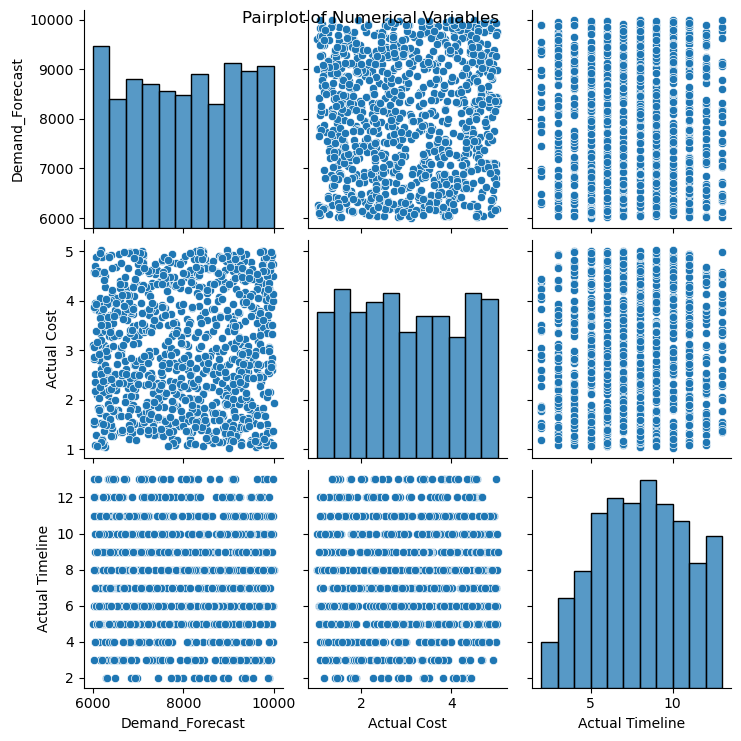

In [34]:
sns.pairplot(df[['Demand_Forecast', 'Actual Cost', 'Actual Timeline']])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()


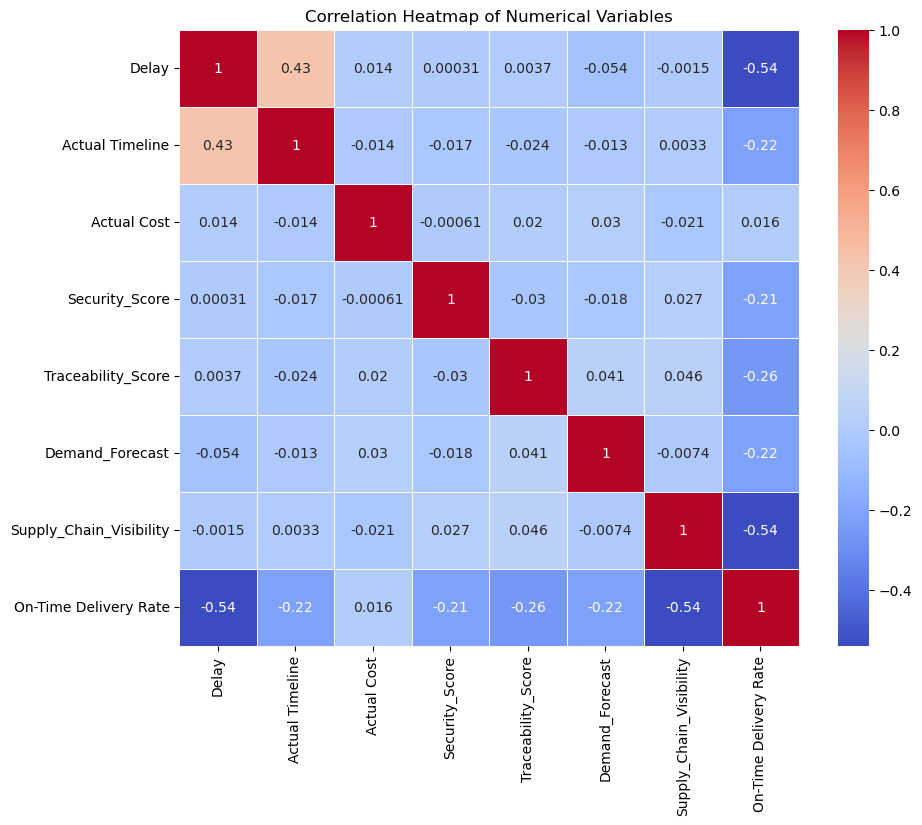

In [35]:
df1=df.drop(columns=['Transport Type','Transport_Encoded'])
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


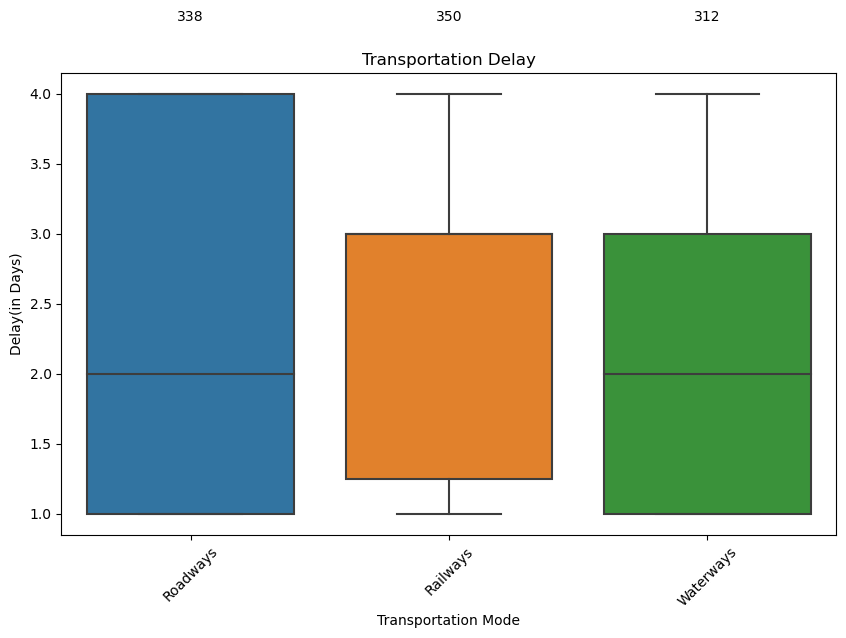

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transport Type', y='Delay')
plt.title('Transportation Delay')
plt.xlabel('Transportation Mode')
plt.ylabel('Delay(in Days)')
plt.xticks(rotation=45)

# Add quantities on top of the graph
for i in range(len(df['Transport Type'].unique())):
    mode = df['Transport Type'].unique()[i]
    delay_hours = df[df['Transport Type'] == mode]['Delay']
    plt.text(i, delay_hours.max() + 0.5, f'{len(delay_hours)}', ha='center', va='bottom')

plt.show()


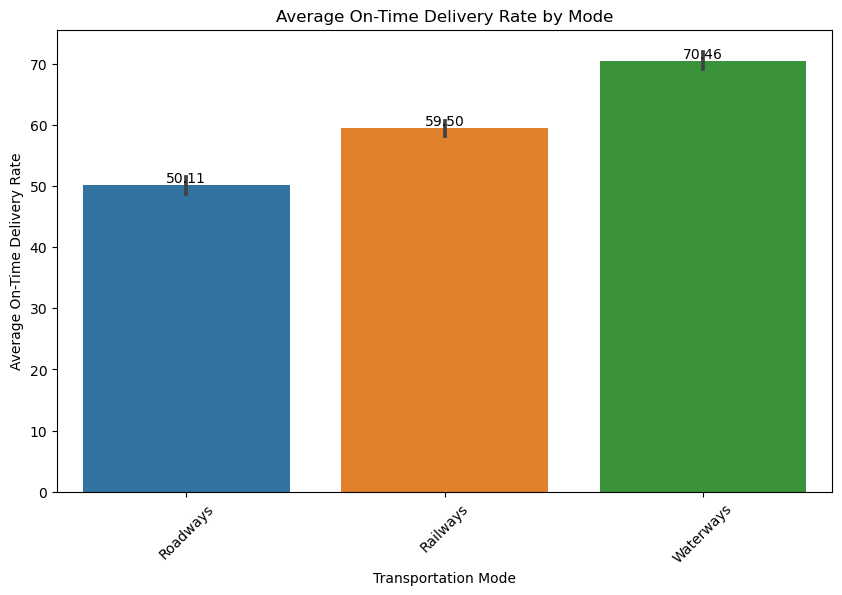

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Transport Type', y='On-Time Delivery Rate', estimator=np.mean)
plt.title('Average On-Time Delivery Rate by Mode')
plt.xlabel('Transportation Mode')
plt.ylabel('Average On-Time Delivery Rate')
plt.xticks(rotation=45)

# Add quantities on top of the graph
for i in range(len(df['Transport Type'].unique())):
    mode = df['Transport Type'].unique()[i]
    on_time_rate = df[df['Transport Type'] == mode]['On-Time Delivery Rate'].mean()
    plt.text(i, on_time_rate + 0.01, f'{on_time_rate:.2f}', ha='center', va='bottom')

plt.show()


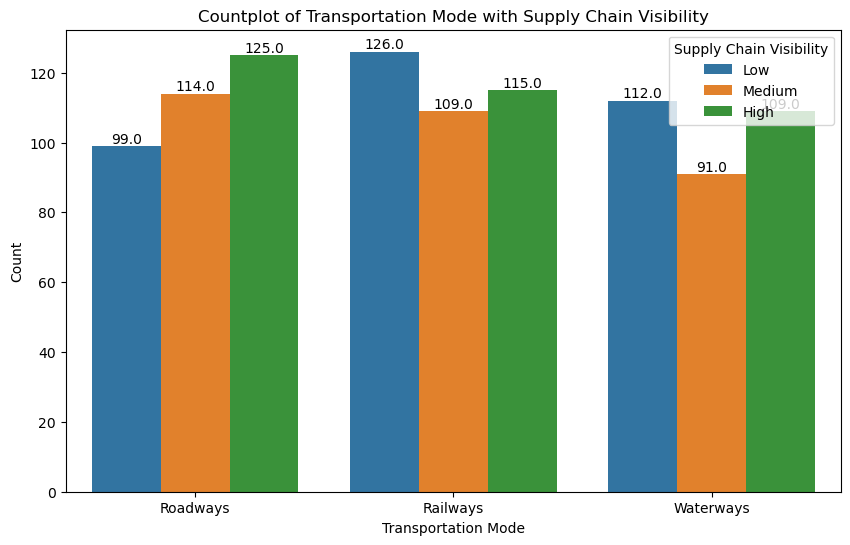

In [38]:
visibility_labels = {1: 'Low', 2: 'Medium', 3: 'High'}
df['Supply_Chain_Visibility_Label'] = df['Supply_Chain_Visibility'].map(visibility_labels)

# Create the countplot
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=df, x='Transport Type', hue='Supply_Chain_Visibility_Label')
plt.title('Countplot of Transportation Mode with Supply Chain Visibility')
plt.xlabel('Transportation Mode')
plt.ylabel('Count')

# Add legend with custom labels
plt.legend(title='Supply Chain Visibility', labels=['Low', 'Medium', 'High'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

In [39]:
# Assuming df is your DataFrame containing the dataset

# Features (X)
X = df.drop(columns=['On-Time Delivery Rate','Transport Type','Supply_Chain_Visibility_Label','Transport_Encoded'])  # Drop the target variable column

# Target variable (y)
y = df['On-Time Delivery Rate']


Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 60.30500354170344


In [41]:
# Assuming df is your DataFrame containing the dataset

# Calculate central tendency (mean, median, mode) and dispersion (standard deviation, variance, range) for each feature
statistics = df.describe().transpose()

# Add mode to the statistics DataFrame
statistics['mode'] = df.mode().transpose().iloc[:, 0]

# Print statistics for each feature
print("Central Tendency and Dispersion for Each Feature:")
print(statistics)


Central Tendency and Dispersion for Each Feature:
                          count         mean          std          min  \
Delay                    1000.0     2.475000     1.140472     1.000000   
Actual Timeline          1000.0     7.561000     2.812150     2.000000   
Actual Cost              1000.0     3.012571     1.178715     1.023551   
Security_Score           1000.0     2.324400     0.312766     1.600000   
Traceability_Score       1000.0     2.213800     0.341007     1.400000   
Demand_Forecast          1000.0  8005.161000  1187.233868  6002.000000   
Supply_Chain_Visibility  1000.0     1.965000     0.813903     1.000000   
Transport_Encoded        1000.0     1.974000     0.806210     1.000000   
On-Time Delivery Rate    1000.0    59.746624    15.085931    18.002640   

                                 25%          50%          75%         max  \
Delay                       1.000000     2.500000     3.250000     4.00000   
Actual Timeline             5.000000     8.000000    